# Building a neural network using PyTorch
Components of a neural network are as follows:
- The number of hidden layers
- The number of units in a hidden layer
- Activation functions performed at various layers
- The loss function that we try to optimize for
- The learning rate associated with neural network
- The batch size of data leveraged to build the neural network
- The number of epochs of forward and bck-propagation

In this chapter, to gain intuition of performing various operations, we will build a neural network on a toy dataset.
Starting the next chapter, we will deal with solving more realistic problems and datasets.

The toy problem we'll solve to understand the implementation of neural networks using PyTorch is a plain addition of two numbers, where we initialize the dataset as follows:

1. Define the input(`x`) and output (`y`) values:

In [3]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
print(x, "\n", y)

[[1, 2], [3, 4], [5, 6], [7, 8]] 
 [[3], [7], [11], [15]]


2. Convert the input lists into tensor objects:

In [4]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

Note that in the preceeding code, we have converted the tensor objects into floating-point objects. It is a good practice to have tensor objects as floats or long ints, as they will be multiplied by decimal values (wieghts) anyway.

Furthermore, we register the input (`X`) and output (`Y`) data points to the device = `cuda` if you have a GPU and `cpu` if you don't have a GPU: 

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device:", device)
X = X.to(device)
Y = Y.to(device)

device: cuda


3. Define the neural network architecture:

In [7]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

It is mandatory to use `forward` as the function name since PyTorch has reserved this function as the method for performing forward propagation.
Using any other name in its place will raise an error.

4. You can access the initial weights of each of the componets by performing the following:
- create an instance of the `MyNeuralNet` class object that we defined earlier and register it to `device`
- obtain parameters of this instance

In [8]:
mynet = MyNeuralNet().to(device)

for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.5657, -0.3582],
        [-0.4178, -0.3197],
        [-0.1744,  0.3804],
        [-0.2740, -0.0774],
        [ 0.5312, -0.6967],
        [-0.2675,  0.1387],
        [-0.0440, -0.1085],
        [ 0.2864, -0.5789]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.4114,  0.5008,  0.0491,  0.6496,  0.6609, -0.4559, -0.1322, -0.5788],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.1330,  0.1685,  0.2984,  0.2386,  0.2932, -0.2678,  0.2854,  0.1477]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.2732], device='cuda:0', requires_grad=True)


5. Define the loss function that we optimize for. Given that we are predicting for a continuous output, we'll optimize for mean squared error:
- The loss value of a neural network can be calculated by passing the input values through the `neuralnet` object and then calculating `MSELoss` for the given inputs:

**NOTE** `_Y` are predicted values, `Y` are actual (ground truth) values.

In [9]:
loss_func = nn.MSELoss()

_Y = mynet(X)
loss_value = loss_func(_Y, Y)
print(loss_value)

tensor(88.4919, device='cuda:0', grad_fn=<MseLossBackward0>)


Now that we have defined the loss function, we will define the optimizer that tries to reduce the loss value. The input to the optimizer will be the parameters (weights and biases) corresponding to the neural network and the learning rate when updating the weights.

For this instance, we will consider the stochastic gradient descent (more on differnet opimizers and the impact of the learning rate in the next chapter).

6. Import the `SGD` method from the `torch.optim` module and the pass the neural network object (`mynet`) and learning rate `lr` as parameters to the `SGD` model.

In [10]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

7. Perform all the steps to be done in an epoch together:
- Calculate the loss value corresponding to the given input and output
- Calculate the gradient corresponding to each parameter
- Update the weights based on the learning rate and gradient of each parameter.
- Once the weights are updated, ensure that the gradients that have been calculated in the previous step are flushed before calculating the gradients in the next epoch:
- Repeat the preceding steps as many times as the number of epochs using a `for` loop. In the following example, we are performing the weight update process for a total of 50 epochs. Furthermore, we are storing the loss value in each epoch in the list - `loss_history`

In [27]:
loss_history = []
for _ in range(50):
    opt.zero_grad() # flush the previous epoch's gradients
    loss_value = loss_func(mynet(X), Y) # compute loss
    loss_value.backward() # perform back-propagation
    opt.step() # update the weights according to the gradients computed
    loss_history.append(loss_value.cpu().detach().numpy())
    #loss_history.append(loss_value)
    

print(loss_history)

[array(0.11862709, dtype=float32), array(0.11832739, dtype=float32), array(0.11802847, dtype=float32), array(0.11773096, dtype=float32), array(0.11743359, dtype=float32), array(0.11713701, dtype=float32), array(0.1168415, dtype=float32), array(0.11654658, dtype=float32), array(0.11625231, dtype=float32), array(0.11595883, dtype=float32), array(0.11566621, dtype=float32), array(0.1153743, dtype=float32), array(0.11508317, dtype=float32), array(0.11479273, dtype=float32), array(0.114503, dtype=float32), array(0.11421388, dtype=float32), array(0.11392586, dtype=float32), array(0.11363834, dtype=float32), array(0.1133517, dtype=float32), array(0.11306582, dtype=float32), array(0.11278042, dtype=float32), array(0.11249611, dtype=float32), array(0.1122121, dtype=float32), array(0.1119291, dtype=float32), array(0.11164664, dtype=float32), array(0.11136505, dtype=float32), array(0.1110841, dtype=float32), array(0.11080416, dtype=float32), array(0.11052456, dtype=float32), array(0.11024594, dty

- Let's plot the variation in loss over increasing epochs (as we saw in the previous chapter, we update the weights in such a way that the overall loss value decreases with increasing epochs):

Text(0, 0.5, 'loss value')

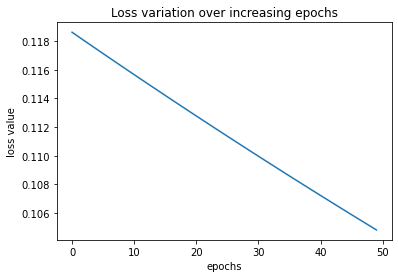

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')